In [71]:
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [72]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

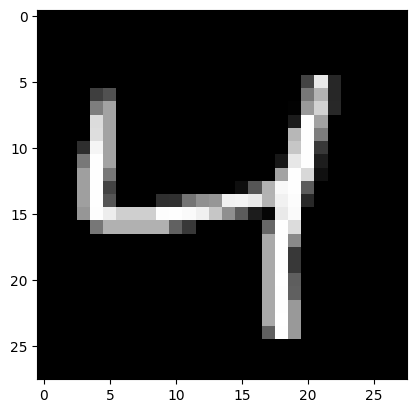

In [73]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2],cmap='gray')
plt.show()

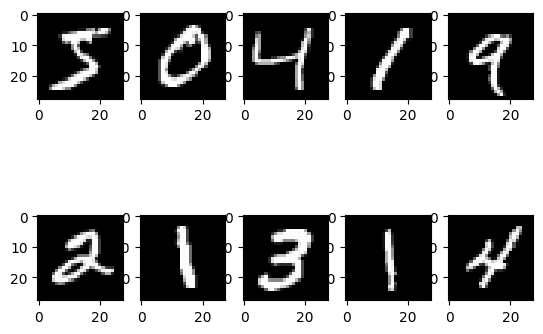

(60000, 28, 28)

In [74]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis=False
plt.show()
x_train.shape

In [75]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train.shape

(60000, 28, 28)

In [76]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [77]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
model=Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [81]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_accuracy',verbose=1,min_delta=0.01,patience=4)
mc=ModelCheckpoint('amazing.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
cb=[es,mc]

In [86]:
model.fit(x_train,y_train,validation_split=0.3,epochs=50,callbacks=cb)

Epoch 1/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.1983 - accuracy: 0.9391
Epoch 1: val_accuracy improved from -inf to 0.97533, saving model to amazing.h5
1313/1313 [==============================] - 131s 98ms/step - loss: 0.1983 - accuracy: 0.9391 - val_loss: 0.0798 - val_accuracy: 0.9753
Epoch 2/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9805
Epoch 2: val_accuracy improved from 0.97533 to 0.98000, saving model to amazing.h5
1313/1313 [==============================] - 113s 86ms/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0645 - val_accuracy: 0.9800
Epoch 3/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9861
Epoch 3: val_accuracy improved from 0.98000 to 0.98167, saving model to amazing.h5
1313/1313 [==============================] - 87s 66ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0598 - val_accuracy: 0.9817
Epoch 4/50
1312/1313 [============================>.]

In [1]:
import tensorflow as tf
MODEL=tf.keras.models.load_model('amazing.h5')

In [2]:
import tensorflow as tf
import pygame,sys
from pygame.locals import *
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2

pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
pygame.init()
WINDOWSIZEX=640
WINDOWSIZEY=480
BOUNDARYINC=5

In [4]:
FONT=pygame.font.Font(None,20)

WHITE=(225,225,225)
BLACK=(0,0,0)
RED=(225,0,0)

IMAGESAVE=False

PRED=True

In [5]:
LABELS={
    0:'ZERO',1:'ONE',2:'TWO',3:'THREE',4:'FOUR',5:'FIVE',6:'SIX',7:'SEVEN',8:'EIGHT',9:'NINE'
}

In [6]:
imdrawing=False

DISPLAYSURF=pygame.display.set_mode((WINDOWSIZEX,WINDOWSIZEY))
pygame.display.set_caption('Digital Board')
number_xcord=[]
number_ycord=[]


In [7]:
while True:
    for event in pygame.event.get():
        if event.type==QUIT:
            pygame.quit()
            sys.exit()
        if event.type==MOUSEMOTION and imdrawing:
            x_cord, y_cord = event.pos
            pygame.draw.circle(DISPLAYSURF,WHITE,(x_cord,y_cord),6,0)
            number_xcord.append(x_cord)
            number_ycord.append(y_cord)
        if event.type==MOUSEBUTTONDOWN:
            imdrawing=True
        if event.type==MOUSEBUTTONUP:
            imdrawing=False
            number_xcord=sorted(number_xcord)
            number_ycord=sorted(number_ycord)

            rect_min_x,rect_max_x=max(number_xcord[0]-BOUNDARYINC,0),min(WINDOWSIZEX,number_xcord[-1]+BOUNDARYINC)
            rect_min_y,rect_max_y=max(number_ycord[0]-BOUNDARYINC,0),min(WINDOWSIZEX,number_ycord[-1]+BOUNDARYINC)

            number_xcord=[]
            number_ycord=[]
            img_arr=np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x,rect_min_y:rect_max_y].T.astype(np.float32)

            if event.type==KEYDOWN:
                if event.unicode=='n':
                    DISPLAYSURF.fill(BLACK)

            if PRED:
                image=cv2.resize(img_arr,(28,28))
                image=np.pad(img_arr,(10,10),constant_values=0)
                image=cv2.resize(image,(28,28))/255

                label=str(LABELS[np.argmax(MODEL.predict(image.reshape(1,28,28,1)))])

                ts=FONT.render(label,True,RED,WHITE)
                textRecObj= ts.get_rect()
                textRecObj.left,textRecObj.bottom=rect_min_x,rect_max_y
                DISPLAYSURF.blit(ts,textRecObj)


    pygame.display.update()

1/1 [==============================] - 0s 50ms/step


SystemExit: 

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
